# Read Dataset

In [274]:
import pandas as pd
df = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


# EDA
Exploratory Data Analysis which is one of the basic and essential steps of a data science project. A data scientist involves almost 70% of his work in doing the EDA of his dataset.

In [275]:
df.shape

(99, 12)

In [276]:
df['Sub-product'].fillna('Other mortage',inplace=True)

In [277]:
df.describe()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,99,99,99,16,33,99,98,89,99,99,99,75
unique,91,11,26,16,5,55,34,88,5,6,1,2
top,8/28/2018,Mortgage,Other mortgage,When my loan was switched over to Navient i wa...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,606XX,Web,Closed with explanation,Yes,No
freq,3,36,13,1,21,11,15,2,72,82,99,56


In [278]:
print(df.isnull().sum())

Date received                    0
Product                          0
Sub-product                      0
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64


# Data Wrangling

In [279]:
df2 = df.loc[: ,['Date received','Product','Sub-product','Consumer complaint narrative','Company public response','Company','State','Submitted via','Company response to consumer','Consumer disputed?']]


In [280]:
df2.describe()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
count,99,99,99,16,33,99,98,99,99,75
unique,91,11,26,16,5,55,34,5,6,2
top,8/28/2018,Mortgage,Other mortgage,When my loan was switched over to Navient i wa...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,Web,Closed with explanation,No
freq,3,36,13,1,21,11,15,72,82,56


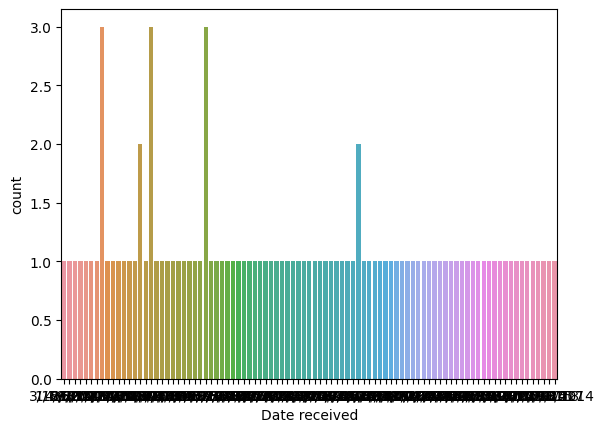

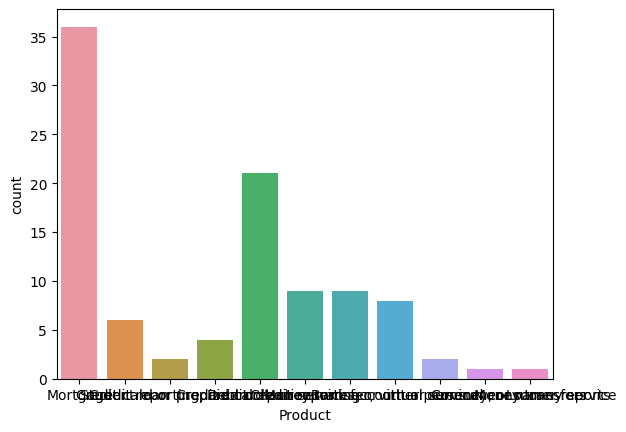

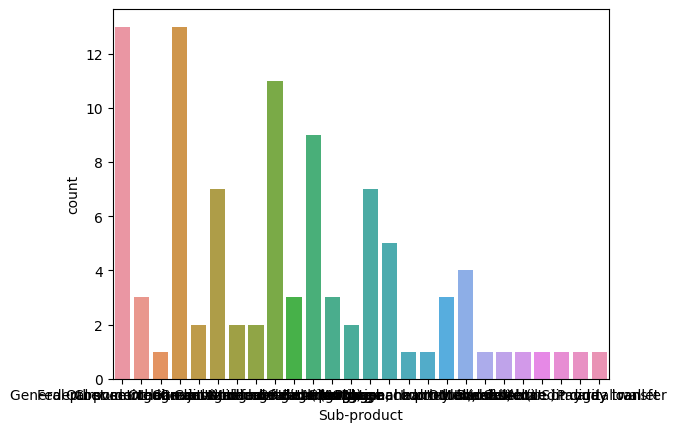

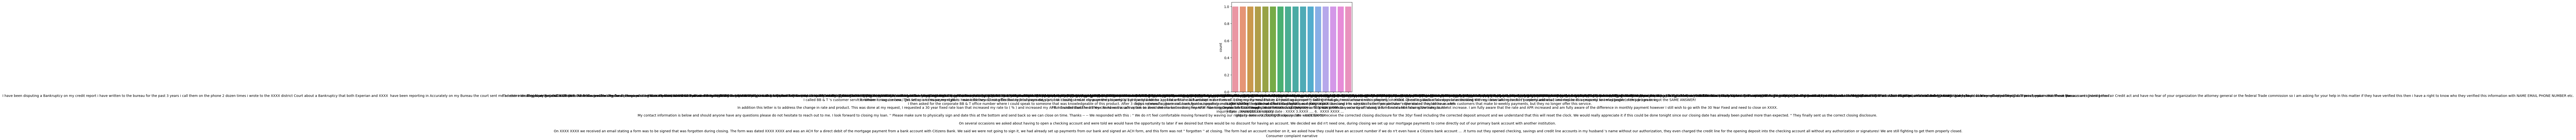

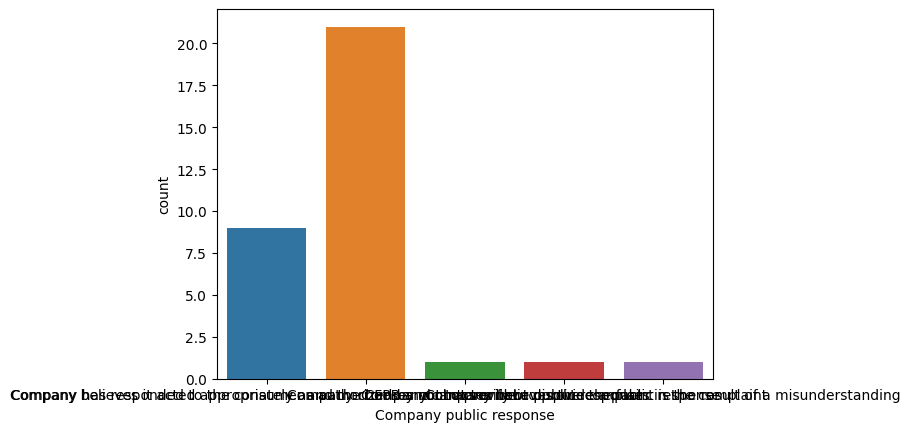

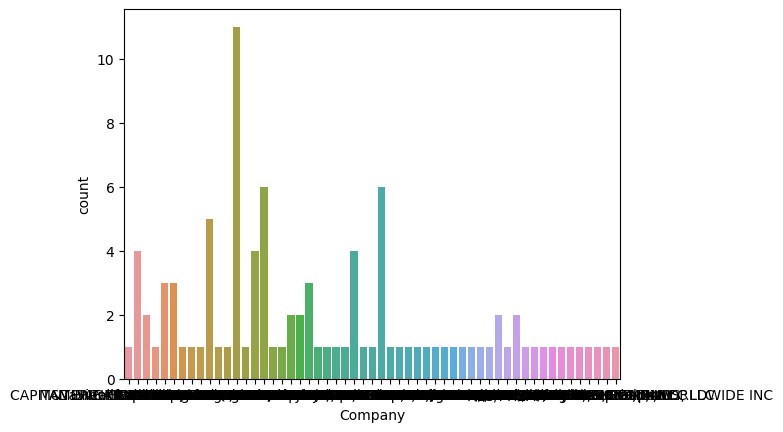

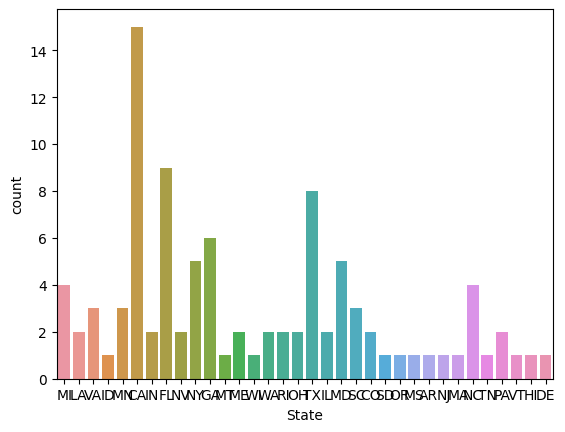

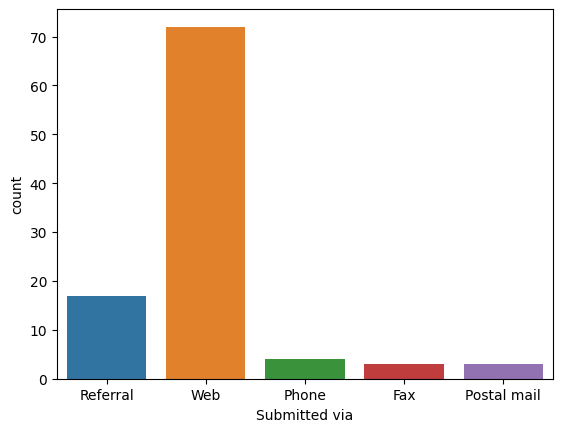

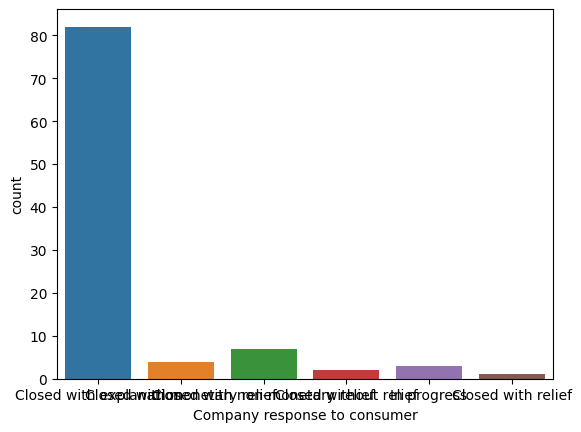

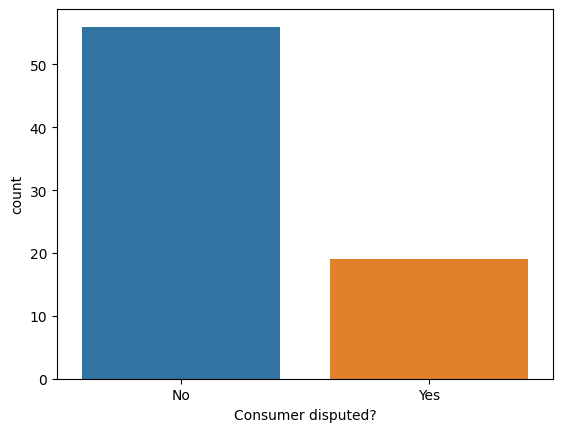

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df2.columns:
    ax = sns.countplot(x=df2[i],data=df2)
    plt.show()

In [282]:
from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# for i in df.columns:
#   if df[i].dtype == object:
#     df[i] = LabelEncoder().fit_transform(df[i])
# df
lb1 = LabelEncoder()
df2['Product'] = lb1.fit_transform(df2['Product'])
lb2 = LabelEncoder()
df2['Sub-product'] = lb2.fit_transform(df2['Sub-product'])
lb3 = LabelEncoder()
df2['Consumer complaint narrative'] = lb3.fit_transform(df2['Consumer complaint narrative'])
lb4 = LabelEncoder()
df2['Company public response'] = lb4.fit_transform(df2['Company public response'])
lb5 = LabelEncoder()
df2['Company'] = lb5.fit_transform(df2['Company'])
lb6 = LabelEncoder()
df2['State'] = lb6.fit_transform(df2['State'])
lb7 = LabelEncoder()
df2['Submitted via'] = lb7.fit_transform(df2['Submitted via'])
lb8 = LabelEncoder()
df2['Company response to consumer'] = lb8.fit_transform(df2['Company response to consumer'])
lb9 = LabelEncoder()
df2['Consumer disputed?'] = lb9.fit_transform(df2['Consumer disputed?'])
df2

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
0,3/12/2014,9,22,16,5,24,14,3,0,0
1,1/19/2017,10,9,14,5,28,10,4,0,0
2,4/6/2018,3,10,6,5,11,30,4,0,2
3,6/8/2014,2,21,16,5,2,7,4,0,1
4,9/13/2014,6,5,16,5,13,30,4,0,1
...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,8,7,16,5,25,14,4,1,0
95,1/20/2015,9,2,16,5,27,3,4,0,0
96,8/15/2018,7,15,16,5,12,1,4,0,2
97,1/29/2017,4,21,16,4,19,4,4,2,0


In [283]:
print(df2.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Consumer disputed?              0
dtype: int64


# Business Problem

1: Early Dispute Prediction

Problem: Identifying consumer complaints that are likely to result in disputes can help prioritize and allocate resources effectively.
Methodology: Binary classification. Train a model to predict whether a consumer complaint will result in a dispute or not. You can use algorithms like Logistic Regression, Random Forest, or Gradient Boosting.
Business Problem

2: Efficient Resource Allocation

Problem: Limited resources need to be allocated optimally to address complaints and disputes.
Methodology: Clustering. Cluster similar complaints together to understand common patterns. This can help in allocating resources more efficiently and addressing complaints systematically.
Business Problem

3: Automated Resolution Suggestions

Problem: Providing automated suggestions for resolving complaints can lead to faster dispute resolution.
Methodology: Natural Language Processing (NLP). Build a model that can analyze consumer complaint narratives and suggest potential resolutions based on historical data and trends.
Business Problem

4: Root Cause Analysis

Problem: Understanding the root causes of complaints can help address underlying issues and reduce dispute rates.
Methodology: Association Rule Mining. Discover associations between products, issues, and disputes. This can help in identifying product-issue combinations that often lead to disputes.
Business Problem

5: Personalized Communication

Problem: Tailoring communication based on consumer preferences can enhance consumer satisfaction and reduce disputes.
Methodology: Recommender System. Build a recommendation model to suggest appropriate communication channels and responses based on consumer profiles and historical interactions.

# Machine Learning Models
Logistic Regression

RandomForestClassifier


Support Vector Machine

In [284]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob

# Splitting data into features and target
X = df2.drop(columns=['Product','Date received','Company response to consumer','Consumer disputed?'])
y = df2['Product']

In [285]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
# Train and evaluate models
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.3000
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.20      0.50      0.29         2
           6       0.00      0.00      0.00         4
           9       0.45      0.50      0.48        10
          10       0.00      0.00      0.00         1

    accuracy                           0.30        20
   macro avg       0.11      0.17      0.13        20
weighted avg       0.25      0.30      0.27        20

Model: Random Forest
Accuracy: 0.7500
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       0.40      0.50      0.44         4
           9       0.83      1.00      0.91        10
  

# Apply NLP & K-Means Clustring


In [288]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

# Select relevant columns
data = data[['Consumer complaint narrative']]

# Drop rows with missing narrative
data.dropna(inplace=True)

In [289]:
# Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['cleaned_narrative'] = data['Consumer complaint narrative'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [290]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data['cleaned_narrative'])

1    9
0    2
4    2
2    2
3    1
Name: cluster, dtype: int64


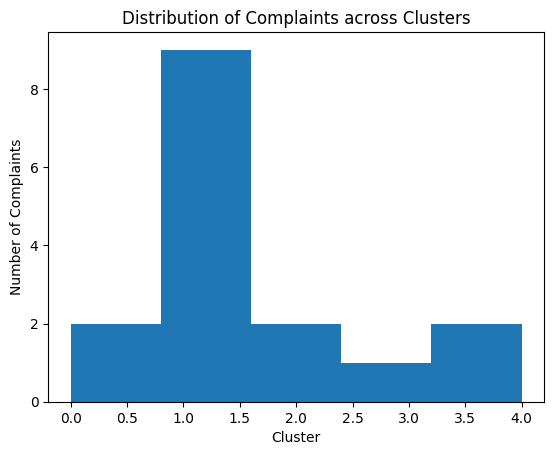

In [291]:
# K-means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Print the distribution of data points across clusters
print(data['cluster'].value_counts())

# Visualize the clusters
plt.hist(data['cluster'], bins=num_clusters)
plt.xlabel('Cluster')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints across Clusters')
plt.show()

In [292]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

# Select relevant columns
data = data[['Consumer complaint narrative', 'Consumer disputed?']]

# Drop rows with missing data
data.dropna(inplace=True)

# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the complaint narratives
data['sentiment'] = data['Consumer complaint narrative'].apply(get_sentiment)

# Feature engineering - Convert sentiment to numerical values
data['sentiment_numerical'] = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Consumer complaint narrative'])

# Combine sentiment and TF-IDF features
X = pd.concat([data['sentiment_numerical'], pd.DataFrame(tfidf_matrix.toarray())], axis=1)
y = data['Consumer disputed?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
